<a href="https://colab.research.google.com/github/shreypachauri3/Multi-Threading/blob/main/Multithreading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Number of CPU threads: 2
Num Threads     Execution Time (seconds)
1               15.96          
2               13.15          


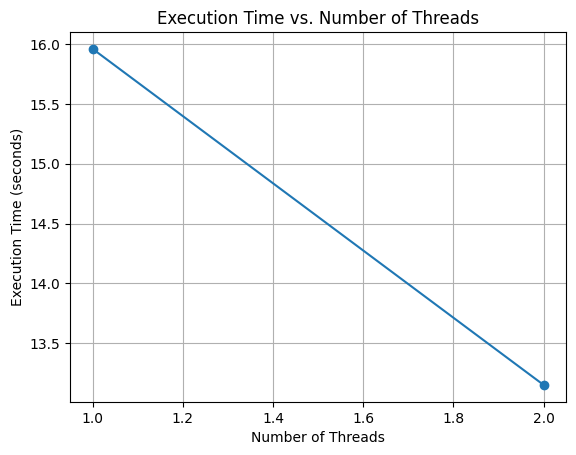

In [1]:
import threading
import numpy as np
import time
import matplotlib.pyplot as plt
import os

# Function to perform matrix multiplication
def multiply_matrices(result, constant_matrix):
    start_time = time.time()
    result_matrix = np.dot(result, constant_matrix)
    end_time = time.time() - start_time
    return end_time

# Generate random matrices
num_matrices = 100
matrix_size = 1000
constant_matrix = np.random.rand(matrix_size, matrix_size)

# Number of threads to use
activeThreads = os.cpu_count() # Get the number of CPU threads

# Lists to store data for plotting
num_threads_list = []
execution_time_list = []

# Perform matrix multiplication with different number of threads
print("Number of CPU threads:", activeThreads)
print("{:<15} {:<15}".format("Num Threads", "Execution Time (seconds)"))
for num_threads in range(1, activeThreads + 1):
    threads = []
    start_time = time.time()
    for _ in range(num_matrices):
        result_matrix = np.random.rand(matrix_size, matrix_size)
        thread = threading.Thread(target=multiply_matrices, args=(result_matrix, constant_matrix))
        threads.append(thread)
        thread.start()

    # Wait for all threads to finish
    for thread in threads:
        thread.join()

    end_time = time.time() - start_time

    # Store data for plotting
    num_threads_list.append(num_threads)
    execution_time_list.append(end_time)

    # Print results in tabular format
    print("{:<15} {:<15.2f}".format(num_threads, end_time))

# Plot execution time vs. number of threads
plt.plot(num_threads_list, execution_time_list, marker='o')
plt.title('Execution Time vs. Number of Threads')
plt.xlabel('Number of Threads')
plt.ylabel('Execution Time (seconds)')
plt.grid(True)
plt.show()
